# Reporting: wrangle_report 
> This report entails the wrangling efforts done on we rate dogs project. 

## Table Of Contents
<ul>
<li><a href="#PROJECT_OVERVIEW">1.0 Project Overview</a></li>
<li><a href="#DATA_GATHERING">2.0 Data Gathering</a></li>
<li><a href="#ASSESSING_DATA">3.0 Assessing Data</a></li>
<li><a href="#DATA_QUALITY_TIDINESS">4.0 Data Quality and Tidy Issues
<li><a href="#QUALITY_ISSUES">4.1.0 Data Quality Issues</a></li>   
<li><a href="#TIDY_ISSUES">4.2.0 Tidy Issues</a></li>
<li><a href="#CLEANING_DATA">5.0 Cleaning Data</a></li>
<li><a href="#COPY_DATA">5.1.0 Copy Data</a></li>
<li><a href="#CQUALITY_ISSUES">5.2.0 Data Cleaning: Quality Issues</a></li>  
<li><a href="#CTIDY_ISSUES">5.3.0 Data Cleaning: Tidiness Issues</a></li>
<li><a href="#STORING_DATA">6.0 Storing Data</a></li>
<li><a href="#VISUALIZATION_INSIGHTS">7.0 Aalyzing and Visualizing Data</a></li>
</ul>
 

<a id='PROJECT_OVERVIEW'></a>
## 1.0 Project Overview

This project entails dataset that involves rating of people's dogs via WeRateDogs twitter account. The aim of the project is to wrangle (analyzing and visualizing) the tweet archive of Twitter user @dog_rates, also known as WeRateDogs.  These ratings almost always have a denominator of 10. The numerators, on the other hand, almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent."

The data provided are in three sets that will be loaded in this notebook differently. The first dataset will be gathered using the read_csv, the second one will be gathered using the get request and the third will be scrapped from twitter using teepy library.

The next step will be assessing the data to identify data quality and tidiness issues for cleaning. After Cleaning, we'll save the data in a new csv and the perform visualization and make insights thereof.

<a id='DATA_GATHERING'></a>
## 2.0 Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

### 2.1 Import Relevant Libraries and Load Data

> After downloading the data, I loaded it using pandas and numpy libraries.

### 2.2 Loading Data

### <font color='blue'>2.2.1. Loading the First DataSet (twitter_archive_enhanced.csv).</font>

> I then loaded the data using pd.read_csv function and previewed a section of the data.

### <font color='blue'>2.2.2 Loading The Second DataSet (image_predictions.tsv) using get request.</font>

> The use the Requests library to download the tweet image prediction (image_predictions.tsv)

**Observations**
> After loading the image predictions file using the get request, the content was returned as a text. In order to read the file from a String into pandas DataFrame, I'll first need to convert the string into StringIO. So, I'll import StringIO from the io library before use. Therefore, I'll import io and the StringIO will have been imported already. 

### 2.2.2.1 Importing the IO
> I used io to read the prediction_df images to pandas data frame. The dataframe had 2075 rows and 12 columns. The column names list was 'tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf' and 'p3_dog'.

**Note**
> Having 1532 true p1_dog predictions and 543 false predictions, I'll narrow down to the true predictions alone because that's the main focus of the analysis. 

### <font color='blue'>2.2.3. Loading The Third DataSet (tweet_json.txt)</font>

> Using the Tweepy library to query additional data via the Twitter API (tweet_json.txt). The column names for the tweet_json.txt file are as listed below:
* 'contributors', 'coordinates', 'created_at', 'display_text_range',
* 'entities', 'extended_entities', 'favorite_count', 'favorited',
* 'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
* 'in_reply_to_status_id', 'in_reply_to_status_id_str',
* 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
* 'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
* 'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
* 'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated', 'user'.
      

**Observation**
> After loading the third data set, I assigned it to a dataframe with variable name tweets_df_3 which had 2354 rows and 31 columns. 

**Note**
> Considering that we needed to have tweet ID, retweet count, and favorite count columns at minimum, and that there are other columns wont be utilized at the moment, I'll load the df_3 with the aforementioned columns only. I created the below function and loaded the tweets to a list with the name tweets_list:

<code>import json
#Create an empty list for loading the tweets data
tweets_list = []<code>
<code>#Create a function for loading the third dataframe
def load_tweets_data():
    with open('tweet-json.txt', 'r') as tweetsfile: 
        for tweet in tweetsfile:
            data = json.loads(tweet)
            tweets_list.append(data)
            dataframe = pd.DataFrame(tweets_list, columns=['id', 'favorite_count', 'retweet_count'])
    return dataframe<code>



**Notes**
> I then assigned the dataframe to a variable df_3 using the function <code>load_tweets_data<code> with this code below:
    <code>df_3 = load_tweets_data().copy(deep=True)<code>. 

This dataframe now had 2354 rows and 3 columns.

**N/B**
One can access specific tweets by their id with the statuses/show/:id API route. Most Python Twitter libraries follow the exact same patterns, or offer 'friendly' names for the methods.

For example, Twython offers several show_* methods, including Twython.show_status() that lets you load specific tweets. Using time.time() to measure the elapsed wall-clock time between two points:

The next thing was to now assess the data and identify eight (8) quality issues and two (2) tidiness issues.

<a id='ASSESSING_DATA'></a>
## 3.0 Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### <font color='blue'>3.1. Assessing the First Dataset (twitter_archive_enhanced.csv)
    
> This file was loaded as df. I'll assess it visually and progmatically to identify any quality and tidiness issues avaliable. Some of the things I'll do to identify if there are any quality issues is that I'll Check if there are any missing values, wrong data types, wrong naming of columns by use of info().

> This dataframe had the following column names: 'tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'.

> After using the info() to check for missing values, below was the output:
<code>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object

**Observation**
> From the above output, it's noted that the dataframe has 2356 entries and and 4 columns. The column names are well written. There are only 78 entries that have values in the in_reply_to_status_id and in_reply_to_user_id columns. Most of the data is missing for the two listed columns.

> It's also indicated that in_reply_to_status_id and in_reply_to_user_id columns have float as the data type. I'll check if this is the case pragmatically.

#### a. Check for the unique values in in_reply_to_status_id and in_reply_to_user_id

Next I'll check for the unique values in in_reply_to_status_id and in_reply_to_user_id by creating a function as shown below:

<code># Create a function for checking unique values
def unique_values(specify_df, column_name):
    return specify_df[column_name].unique()
    

**Observation**
>The in_reply_to_status_id and in_reply_to_user_id columns had the values in exponential format thus difficult to know the exact values in the stated columns.

### <font color='blue'>3.2. Assesing the Second DataSet (image_predictions.tsv)
> This dataset was loaded as predictions_df. I'll perform assessment both visually and progmatically. To do so, I'll first preview it using the <code>predictions_df.head()

**Column Definitions for the Predictions Dataframe**
The definitions for the above dataframe are as listed below:
>* tweet_id is the last part of the tweet URL after "status/" → https://twitter.com/dog_rates/status/889531135344209921
>* p1 is the algorithm's #1 prediction for the image in the tweet → golden retriever
>* p1_conf is how confident the algorithm is in its #1 prediction → 95%
>* p1_dog is whether or not the #1 prediction is a breed of dog → TRUE
>* p2 is the algorithm's second most likely prediction → Labrador retriever
>* p2_conf is how confident the algorithm is in its #2 prediction → 1%
>* p2_dog is whether or not the #2 prediction is a breed of dog → TRUE etc

#### b. Check the data type, missing values and the naming of columns

>I used info() to check for missing values on the predictions_df and found no missing values.

**Notes**
The unique values in img_num column in predictions_df had four unique values (1,2,3,4). 

#### c. Check for unique values in p1, p2 and p3

> After check for the unique values in p1, p2 and p3, it was noted that there were some names that appeared as dog names yet they are not. More details on the unique values is as indicated in this [link](https://docs.google.com/document/d/11dT1RSS-6ZFwQSpdrWdiW9BrcBu_ddelvQ9BSyhpilM/edit?usp=sharing).
    


**Observation**
>From the above output. there are 2075 entries and 12 columns. The info method indicates that there are no missing values and that the data types are in the right format. However, the naming of the unique values in p1, p2 and p3 are not consitent. Some have underscores, hyphen, others are written in small letters while some start with upper cases.

> There are names listed as dogs but they aren't dog breeds such as wooden_spoon, pencil_box, envelope, coffee_mug etc in p1

### <font color='blue'>3.3 Assessing the Third DataSet (tweet-json.txt)
This dataset was loaded as df_3.

**Observation**
>There are missing values from the displayed last five rows. I'll use the info() to check for further issues.

**Observation**
>The tweet_json.txt file was loaded as df_3. The info() indicates there are no null values. The data types are in the right formats.

<a id='DATA_QUALITY_TIDINESS'></a>
## 4.0 Data Quality and Tidiness Issues

<a id='QUALITY_ISSUES'></a>
### 4.1.0 Quality Issues
>1. Columns in_reply_to_status_id and in_reply_to_user_id columns in the twitter_archived_enhanced.csv have lots of missing data.

>2. in_reply_to_status_id and in_reply_to_user_id columns in the twitter_archived_enhanced.csv (df) had the values in exponential.

>3. The timestamp column in twitter_archived_enhanced.csv (df) was in object instead of datetime format.

>4. The names of dog breeds in the predictions df are not consistent. Some names have underscores, hypen, upper case

>5. From the visual assessment, the rating denominator should be 10 but there are values i.e 0, 15, 70, 7, 11, 150, 170, 20, 50, 90, 80, 40, 130, 110, 16, 120, 2 .

>6. Some columns in the df dataframe are not necessary such as the name, expanded urls, text, source among others. It represents the name od the dogs and not the breed of the dog.

>7. The naming of the columns in predictions_df are not discrete i.e img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog. It is difficult for one to understand what the columns represent

>8. Some names listed as breeds of dogs are not correct. Example is wooden spoon, pencil box, envelope, entertainment centre, lifeboat, coackroach, crate, water_bottle among others.

<a id='TIDY_ISSUES'></a>
### 4.2.0 Tidy Issues
>1. In the third dataframe (df_3) the breeds of dog p1, p2 and p3 should be in one column where it captures the breed with the highest confidence level. This column could be referred to type of breed.

>2. The tweet id are in dataframe one and two while in the third dataframe, it is referred to as id. This should be merged to one dataframe so that there's only one tweet id.

>3. The dog stages in the first dataframe (df) are captured in separate columns. This should be in one column called dog_stages with the details of the stages of the dog i.e. doggo, floofer, pupper, and puppo. More infomation is found via the (#WeRateDogs book)(https://www.amazon.com/WeRateDogs-Most-Hilarious-Adorable-Youve/dp/1510717145) on Amazon.

<a id='CLEANING_DATA'></a>
## 5.0 Cleaning Data
In this section, I performed cleaning **all** of the issues documented earlier during assessessment. 

**Note:** Before cleaning the dataframes, I made copies of the original data before cleaning. Cleaning included merging of individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). 

<a id='COPY_DATA'></a>
### 5.1.0 Copy Data

> Before perfoming any cleaning, I made copies of the dataframes as df_1_copy, df_2_copy and df_3_copy.

<a id='CQUALITY_ISSUES'></a>
### 5.2.0 Data Cleaning: Quality Issues

### <font color='blue'>Issue #1: 
><font color='blue'>**Columns in_reply_to_status_id and in_reply_to_user_id columns in the twitter_archived_enhanced.csv have lots of missing data.**

**output**
> I dropped these columns using the drop function then previewed the column names to confirm the columns are dropped using <code>df_1_copy.columns

### <font color='blue'>Issue #2:
><font color='blue'>**a. in_reply_to_status_id and in_reply_to_user_id columns in the twitter_archived_enhanced.csv (df) had the values in exponential.**

#### Note
> These columns have been dropped otherwise to remove exponential in python, I would have used the lambda function to supress the scientific notation. I'll make a copy of the origainal dataframe and perform this step.

><font color='blue'>**b. Rename the column names ('doggo', 'floofer', 'pupper', 'puppo') in twitter_archived_enhanced.csv.**

**Code**

<code># Rename the column names of the dog stages
df_1_copy.rename(columns = {'floofer' : 'floofer_stage',
                           'doggo' : 'doggo_stage',
                           'pupper': 'pupper_stage',
                           'puppo': 'puppo_stage'}, inplace=True)

**Test**

> I then previewed the column names to confirm if columns have been renamed using df_1_copy.columns.

### <font color='blue'>Issue #3:
><font color='blue'>**The timestamp column in twitter_archived_enhanced.csv (df) was in object instead of datetime format.**

**Define**
>Change the timestamp column from object to datetime datatype using to_datetime method.

### <font color='blue'>Issue #4:
><font color='blue'>**The names of dog breeds in the predictions df are not consistent. Some names have underscores, hypen, upper case.**

**Define**
>Remove the hyphens, underscores and upper case using str.lower() and .replace() in columns p1, p2 and p3. 

**Note:**
>Considering that python is case sensitive, I'll lower all the dog breeds in columns p1, p2 and p3 and thereafter remove the underscores and hyphens and replace them with white/empty spaces.

**Observation:**
> From the above output, it is evident that the dog breeds are in lower case and that the underscores and hyphens have been removed.

### <font color='blue'>Issue #5:
><font color='blue'>**From the visual assessment, the rating denominator should be 10 but there are values i.e 0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2 .**

**Define**
>Drop the rating denominator column using .drop(). This column isn't of much use during the analysis.

### <font color='blue'>Issue #6:
><font color='blue'>**Some columns in the first dataframe (df_1_copy) are not necessary such as the name, expanded urls, text, source among others. It represents the name of the dogs and not the breed of the dog.**

**Define**
>Use the drop function to remove columns that won't be used during analysis

### <font color='blue'>Issue #7:
><font color='blue'> **The naming of the columns in predictions_df are not discrete i.e img_num, p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog. It is difficult for one to understand what the columns represent.**   

**Define**
>Rename the columns p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog to prediction_1, prediction_1_confidence, prediction_1_status,prediction_2, prediction_2_confidence, prediction_2_status, prediction_3, prediction_3_confidence, prediction_3_status 

<a id='CTIDY_ISSUES'></a>
### 5.3.0 Data Cleaning: Tidiness Issues

### <font color='blue'>Issue #8:
><font color='blue'>**Some names listed as breeds of dogs are not correct. Example is wooden spoon, pencil box, envelope, entertainment centre, lifeboat, coackroach, crate, water_bottle among others.**

**Define**
>* Having the three confidence level on the predictions, I'll drop the second and third confidence because the first confidence (prediction confidence) with a level of 95% is more reliable amongst the three cofidence levels. Therefore, I'll drop prediction_2, prediction_2_confidence, prediction_2_status, prediction_3, prediction_3_confidence, prediction_3_status and max_confidence. But before then, I'll create a new column (max_confidence) that captures the highest confidence level in every entry.

>* Bearing in mind that the project focuses on dogs, the next thing will be to drop the false on prediction_1_status as they are not dogs. 

**Note:**
>Check if all the values in the max_confidence column belong to prediction_1_confidence as this is the predictions with 95% confidence amongst the other two confidence level (p2 and p3).

#### Option1: Check if all the values in the max_confidence column belong to prediction_1_confidence.


**Observation**
> From the above output, it's evident that all the values in max_confidence column, are from the prediction_1_confidence. To prove this further, I'll check for the shape of these true values.

#### Option 2: Check if all the values in the max_confidence column belong to prediction_1_confidence.


#### Check if all the values in the max_confidence column belong to prediction_1_confidence.
>**Option 3**

**Observation**
> It was evident that the highest predictions were captured in prediction_1. Therfore, I dropped the details for Prediction_2 and prediction_3 which are prediction_2, prediction_2_confidence, prediction_2_status, prediction_3', prediction_3_confidence, prediction_3_status and max_confidence.

Next, I'll therefore check the false values in prediction_1_status and drop them also because we only need to retain the dogs only.

> Looking at the prediction confidence level, despite the fact that some had high confidence of i.e 0.949591, the result obtained was web site and the prediction status was false. Therefore, dropping this entries is viable because the predictions are not dogs.

### <font color='blue'>Issue #9:
><font color='blue'>**In the second dataframe (prediction_df) the breeds of dog p1, p2 and p3 should be in one column where it captures the breed with the highest confidence level. This column should capture the type of dogs breed.**
This issue was resolved already.

**Notes**
>Considering that the prediction column has all true values, I dropped this column.

### <font color='blue'>Issue #10:
><font color='blue'>**The dog stages in the first dataframe (df) are captured in separate columns. This should be in one column called dog_stages with the details of the stages of the dog i.e. doggo, floofer, pupper, and puppo.**

**Note**

> I used the melt() to put the dog stages in one column then checked for the count of the unique values in the four columns to ensure that the right values are obtained after melting the respective columns. To perform this step, I'll create a function for value count.

>Then to condense the four columns doggo, floofer, pupper and puppo into one column, I begun by replacing the None with 'missing' then use the 
```
melt()
```to have four dog stages in one column called dog_stages. Not replacing the None will make the empty spaces have dog stages values.



> I then replaced the None with the word missing by creating a function for value count that will return the number of unique values in floofer, doggo,pupper and poppo columns. Having no other missing values, I saved the output to a new dataframe.

### <font color = 'Blue'>Issue #11:
><font color = 'Blue'>**The tweet id are in dataframe one and two while in the third dataframe, it is referred to as id. This should be merged to one dataframe so that there's only one tweet id.**

**Define**
> Here, I renamed the id in the third dataframe to tweet_id then merge the three dataframe.

#### Additional Cleaning of Quality Issues
> I dropped the retweet column in the third data set and all rows that had retweet data captured in the first dataset. 

> Having remained with original tweets only, I dropped the retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp columns as their values are all nan.

### Merging the three DataFrames.
> I then merged the three dataframes to a cleaned_data

<a id='STORING_DATA'></a>
## 6.0 Storing Data
I saved the gathered, assessed and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

<a id='VISUALIZATION_INSIGHTS'></a>
## 7.0 Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. Find out if there's any relation between the img_num and prediction confidence.

2. Find out if there's any relation between dog_stages_type, favorite_count, and prediction_confidence.

3. Find out the dog stages with the highest number of prediction per confidence level.

4. Check which day, month or year had the highest tweets.

### Visualization

### 1. Find out if there's any relation between the img_num and prediction confidence.

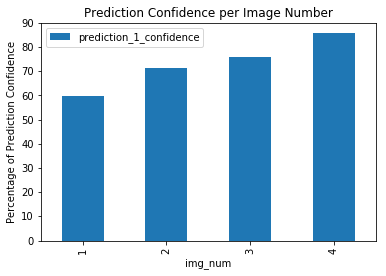

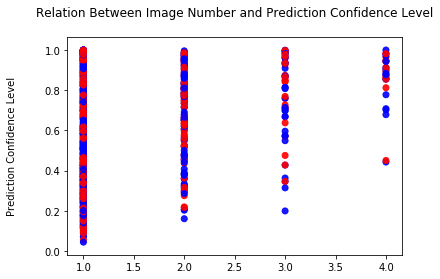

**Observation**
> From the above two charts, it's evident that the images with the highest number of images were able to have high prediction confidence level. This prediction confidence reduced consequently with the reduction of the number of images. images with four number of images achieved a prediction confidence of 87% while images of one image had 59% confidence.

> It's also noted that there's no correlation in image number and prediction confidence level although the bar chart inicated that images with high number of images had high prediction confidence. This is a true indication of correlation is not causation and more insights need to be performed before making conclusions.

### 2. Find out if there's any relation between tweet_id, rating_numerator, img_num, favorite_count, and prediction_1_confidence.

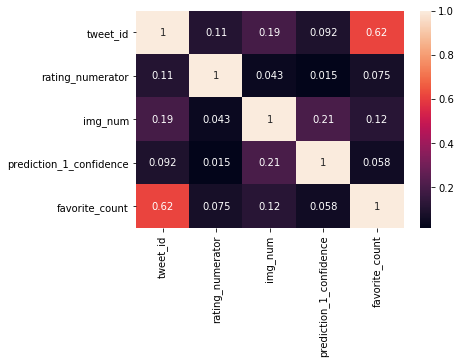

**Observation**
> The heatmap above indicates that there's is a positive correlation between favorite count and tweet id with a value of 0.62. Prediction confidence had the weakest positive correlation of 0.015 followed by Rating numerator and image number with a weak positive correlation of 0.043 then followed by Favorite count and prediction confidence level with a weak corelation of 0.058.

### 3. Find out the dog stages with the highest number of prediction per confidence level.

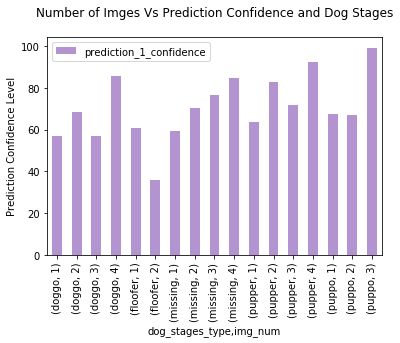

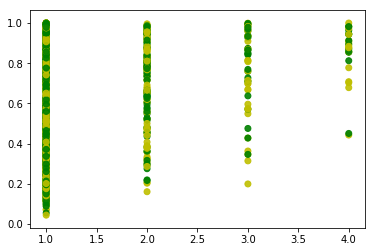

**Observation**
> Puppo dog stage had the highest prediction confidence of 97% with an average of 3 images. The scatter plot also indicates there's no correlation between these variables.

### 4. Which Dog Stage had the highest Tweet per day?

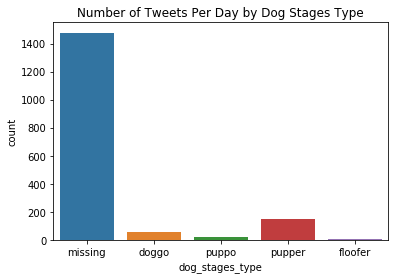

**Observation**
> Pupper had the highest number of tweets per day followed by Doggo, Puppo then Floofer.

### 5. Which Dog Stage had the Highest Favorite Count?

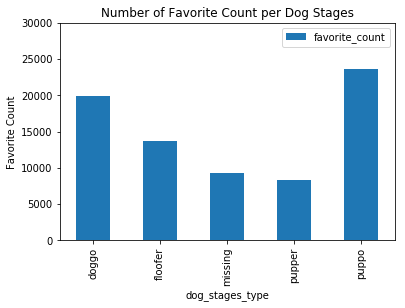

**Observation**
> Puppo dog stage had the highest number of favorite count with a value of 24000 favorite count.

### 6. Find out which dog prediction had the highest prediction percentage?


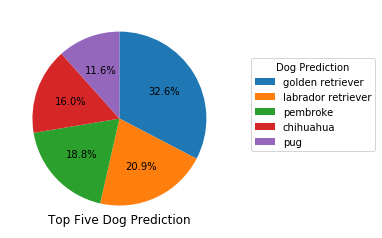

**Observation**
> The Golden Retiever had the highest prediction percentage as shown in the pie chart above.

**Conclusion**
> It was noted that Pupper had the highest number of tweets per day but had the lowest number (8000) of favorite counts while Puppo had the highest number of favorite counts but second lowest number of tweets per day. This is an indication that although had the highest number of tweets, it seemed not to be the favorite Dog stage and there's need to investigate as to why this is so. The investigation could entail considering other variables and building machine learning models that could help discover the insights thereof.